## Titanic Data Investigation: what sorts of people were more likely to survive?

### 1. Introduction

In this project, we will investigate "Titanic Data", which contains demographics and passenger information from sample passengers and crew on board the Titanic. The dataset and its decription could be found at the following website address: https://www.kaggle.com/c/titanic/data.

Basically, each observation in the dataset shows the information of a person aboard and if the person survived in the accident. We will analyze some of the personal information in detail to see if people with some characteristics were more likely to survive.

Questions I will study within this project are listed below:
- Question 1: Were people in higher passenger class more likely to survive?
- Question 2: Were female people more likely to survive?
- Question 3: How different distributed were the ages of people who survived from people who did not survive?

### 2. Data Exploration

#### 2.0. Data Wrangling

We first read the data we need into a pandas dataframe and have a brief data overview.

For convenience, sex of "male" is denoted by 1 and sex of "female" is denoted by 0.

In [1]:
import pandas as pd
df = pd.read_csv("titanic_data.csv")[['Survived', 'Pclass', 'Sex', 'Age']]

## use 1 to denote male and 0 to denote female
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

print "Sample observations amount: " + str(len(df))
print "Description of sample observations:"
df.describe()

Sample observations amount: 891
Description of sample observations:


,Survived,Pclass,Sex,Age
count,891.000000,891.000000,891.000000,714.000000
mean,0.383838,2.308642,0.647587,29.699118
std,0.486592,0.836071,0.477990,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,20.125000
50%,0.000000,3.000000,1.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


Here we have created a pandas dataframe called "df" to save the information of if a person survived and the person's passenger class, sex, and age.

However, it shows that for some people, their age information is missing. Therefore we will create a new pandas dataframe for our Question 3, which is to study the age difference between people who survived and who did not survive. The new dataframe is called "df_age".

In [2]:
df_age = df.dropna()
print "Description of sample observations with age values:"
df_age.describe()

Description of sample observations with age values:


,Survived,Pclass,Sex,Age
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.634454,29.699118
std,0.491460,0.838250,0.481921,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,0.000000,20.125000
50%,0.000000,2.000000,1.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


#### 2.1. Exploration: survival status and passenger class

We first look into our dependent variable "Survived". We can make a barplot as below.

Amount of people survived: 342
Amount of people not survived: 549


([<matplotlib.axis.XTick at 0x116f52350>,
 <a list of 2 Text xticklabel objects>)

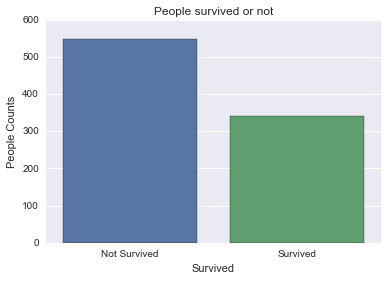

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print "Amount of people survived: " + str(sum(df['Survived'] == 1))
print "Amount of people not survived: " + str(sum(df['Survived'] == 0))
survival_by_status = df.groupby('Survived').size().reset_index()
sns.barplot(data = survival_by_status, x = 'Survived', y = 0)
plt.ylabel('People Counts')
plt.title('People survived or not')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

In the sample, 342 people survived and 549 people did not survive. Clearly, more people in the sample did not survive in the accident.

We then look into the dependent variable "Pclass". We can make a histogram as below.

Amount of people in 1st class: 216
Amount of people in 2nd class: 184
Amount of people in 3rd class: 491


([<matplotlib.axis.XTick at 0x11995cb50>,
 <a list of 3 Text xticklabel objects>)

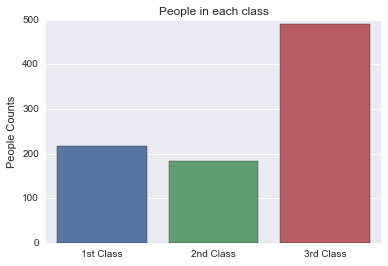

In [4]:
print "Amount of people in 1st class: " + str(sum(df['Pclass'] == 1))
print "Amount of people in 2nd class: " + str(sum(df['Pclass'] == 2))
print "Amount of people in 3rd class: " + str(sum(df['Pclass'] == 3))
people_by_class = df.groupby('Pclass').size().reset_index()
sns.barplot(data = people_by_class, x = 'Pclass', y = 0)
plt.ylabel('People Counts')
plt.xlabel('')
plt.title('People in each class')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])

In the sample, 216 people were in 1st class, 184 people were in 2nd class, and 491 people were in 3rd class. It seems that most people were in 3rd class. The number of people in 1st class is a little bit more than people in 2nd class.

To study the survival rate in each passenger class, we can group people by passenger class and calculate the survival rate in each class.

In [5]:
survival_by_class = df['Survived'].groupby(df['Pclass']).mean()
print survival_by_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


It shows that 1st class had a survival rate around 63%, 2nd class had a survival rate around 47%, and 3rd class had a survival rate merely around 24%. It seems that people in higher classes were more likely to survive.

We can better see this phenomenon by plotting the survival rate of each class as below.

([<matplotlib.axis.XTick at 0x119a30590>,
 <a list of 3 Text xticklabel objects>)

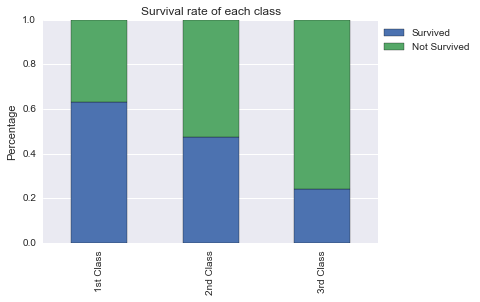

In [6]:
df1 = pd.DataFrame({'Class': [1, 2, 3], 'Survived': survival_by_class})
df2 = pd.DataFrame({'Class': [1, 2, 3], 'Not Survived': 1 - survival_by_class})
frames = df1.merge(df2, how="left")
frames[['Survived', 'Not Survived']].plot(kind='bar', stacked=True).legend(bbox_to_anchor=(1.3, 1))
plt.ylabel('Percentage')
plt.title('Survival rate of each class')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])

To further check if higher class had higher survival rate, we can make some hypothesis tests. Assume people's survival status in 1st class is of Bernoulli distribution, with parameter p_1. In other words, a person in 1st class had possibility of p_1 to survive and (1 - p_1) to not survive. Then we can have the following one-tailed hypothesis:

H<sub>0</sub>: p_1 <= 0.5

H<sub>1</sub>: p_1 > 0.5

Since the sample size is large, so the total number of survival people in 1st class is approximately normally distributed with mean (n_1 \* p_1) and standard deviation sqrt(n_1 \* p_1 \* (1-p_1)), where n_1 is the sample size.

Suppose Y_1 is the actual number of survival people in 1st class, then we can calculate our test statistic (Y_1 - n_1 \* 0.5)/sqrt(n_1 \* 0.5 \* (1-0.5)):

In [7]:
import math
class_1 = df['Survived'][df['Pclass']==1]
p1_stat = (class_1.sum() - len(class_1)*0.5)/math.sqrt(len(class_1)*0.5*0.5)
print "test statistic is: " + str(p1_stat)

test statistic is: 3.81031737766


Under significance level of 0.5%, we can get the critical to reject the null hypothesis:

In [8]:
import scipy.stats as st
print st.norm.ppf(.995)

2.57582930355


Since the test statistic is much higher than the critical value, so we can reject the null hypothesis with 99.5% confidence. In other words, a person in 1st class had possibilty larger than 0.5 to survive.

Similarly, we can assume people's survival status in 3rd class is of Bernoulli distribution, with parameter p_3. In other words, a person in 3rd class had possibility of p_3 to survive and (1 - p_3) to not survive. Then we can have the following one-tailed hypothesis:

H<sub>0</sub>: p_3 >= 0.5

H<sub>1</sub>: p_3 < 0.5

Since the sample size is large, so the total number of survival people in 3rd class is approximately normally distributed with mean (n_3 \* p_3) and standard deviation sqrt(n_3 \* p_3 \* (1-p_3)), where n_3 is the sample size.

Suppose Y_3 is the actual number of survival people in 3rd class, then we can calculate our test statistic (Y_3 - n_3 \* 0.5)/sqrt(n_3 \* 0.5 \* (1-0.5)):

In [9]:
class_3 = df['Survived'][df['Pclass']==3]
p3_stat = (class_3.sum() - len(class_3)*0.5)/math.sqrt(len(class_3)*0.5*0.5)
print "test statistic is: " + str(p3_stat)

test statistic is: -11.4177301649


Under significance level of 0.5%, we can get the critical to reject the null hypothesis:

In [10]:
print st.norm.ppf(.005)

-2.57582930355


Since the test statistic is much lower than the critical value, so we can reject the null hypothesis with 99.5% confidence. In other words, a person in 3rd class had possibilty smaller than 0.5 to survive.

From the plots and statistical analyses above, we could see that people in higher class had larger possibility to survive. However, we can only tell the correlation but not the causation. Actually, there are many possible explanations: maybe higher class was equipped with better emergency facilities; maybe people in higher class were taught more about how to save life in sea; maybe higher class was not so crowded so that people were easier to evacuate. There is no clear evidence to tell if it is the passenger class that differentiates the survival rate.

#### 2.2. Exploration: survival status and sex

To look into the dependent variable "Sex", We can make a histogram as below.

Amount of female people: 314
Amount of male people: 577


([<matplotlib.axis.XTick at 0x119954290>,
 <a list of 2 Text xticklabel objects>)

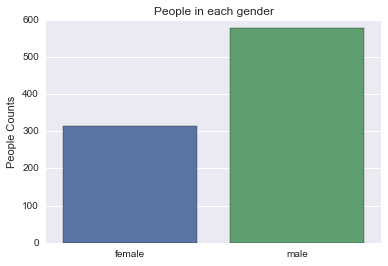

In [11]:
print "Amount of female people: " + str(sum(df['Sex'] == 0))
print "Amount of male people: " + str(sum(df['Sex'] == 1))
people_by_sex = df.groupby('Sex').size().reset_index()
sns.barplot(data = people_by_sex, x = 'Sex', y = 0)
plt.ylabel('People Counts')
plt.xlabel('')
plt.title('People in each gender')
plt.xticks([0, 1], ['female', 'male'])

In the plot above, 0 stands for female and 1 stands for male.

In the sample, 314 people were female and 577 people were male. Most people were male in the sample. Male amount was almost twice the female amount.

To study the survival rate in each gender, we can group people by gender and calculate the survival rate in each gender.

In [12]:
survival_by_sex = df['Survived'].groupby(df['Sex']).mean()
print survival_by_sex

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64


In the result above, 0 stands for female and 1 stands for male.

The result is very impressing. It shows that female had a survival rate around 74%, and male had a survival rate merely around 19%. It seems that female people were way more likely to survive in the accident.

We can better see this phenomenon by plotting the survival rate of each gender as below.

([<matplotlib.axis.XTick at 0x119b37cd0>,
 <a list of 2 Text xticklabel objects>)

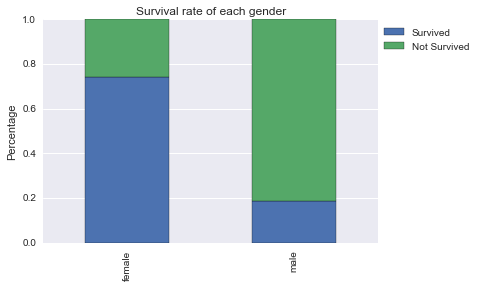

In [13]:
df1_sex = pd.DataFrame({'Sex': [0, 1], 'Survived': survival_by_sex})
df2_sex = pd.DataFrame({'Sex': [0, 1], 'Not Survived': 1 - survival_by_sex})
frames_sex = df1_sex.merge(df2_sex, how="left")
frames_sex[['Survived', 'Not Survived']].plot(kind='bar', stacked=True).legend(bbox_to_anchor=(1.3, 1))
plt.ylabel('Percentage')
plt.title('Survival rate of each gender')
plt.xticks([0, 1], ['female', 'male'])

In the plot above, 0 stands for female and 1 stands for male.

To further check if females had higher survival rate, we can make some hypothesis tests. Assume female people's survival status is of Bernoulli distribution, with parameter p_0. In other words, a female had possibility of p_0 to survive and (1 - p_0) to not survive. Then we can have the following one-tailed hypothesis:

H<sub>0</sub>: p_0 <= 0.5

H<sub>1</sub>: p_0 > 0.5

Since the sample size is large, so the total number of survival females is approximately normally distributed with mean (n_0 \* p_0) and standard deviation sqrt(n_0 \* p_0 \* (1-p_0)), where n_0 is the sample size.

Suppose Y_0 is the actual number of survival females, then we can calculate our test statistic (Y_0 - n_0 \* 0.5)/sqrt(n_0 \* 0.5 \* (1-0.5)):

In [14]:
sex_0 = df['Survived'][df['Sex']==0]
p0_stat = (sex_0.sum() - len(sex_0)*0.5)/math.sqrt(len(sex_0)*0.5*0.5)
print "test statistic is: " + str(p0_stat)

test statistic is: 8.57785624934


Under significance level of 0.5%, we can get the critical to reject the null hypothesis:

In [15]:
print st.norm.ppf(.995)

2.57582930355


Since the test statistic is much higher than the critical value, so we can reject the null hypothesis with 99.5% confidence. In other words, a female had possibilty larger than 0.5 to survive.

Similarly, we can assume male people's survival status is of Bernoulli distribution, with parameter p_1. In other words, a male had possibility of p_1 to survive and (1 - p_1) to not survive. Then we can have the following one-tailed hypothesis:

H<sub>0</sub>: p_1 >= 0.5

H<sub>1</sub>: p_1 < 0.5

Since the sample size is large, so the total number of survival males is approximately normally distributed with mean (n_1 \* p_1) and standard deviation sqrt(n_1 \* p_1 \* (1-p_1)), where n_1 is the sample size.

Suppose Y_1 is the actual number of survival males, then we can calculate our test statistic (Y_1 - n_1 \* 0.5)/sqrt(n_1 \* 0.5 \* (1-0.5)):

In [16]:
sex_1 = df['Survived'][df['Sex']==1]
p1_stat = (sex_1.sum() - len(sex_1)*0.5)/math.sqrt(len(sex_1)*0.5*0.5)
print "test statistic is: " + str(p1_stat)

test statistic is: -14.9453655517


Under significance level of 0.5%, we can get the critical to reject the null hypothesis:

In [17]:
print st.norm.ppf(.005)

-2.57582930355


Since the test statistic is much lower than the critical value, so we can reject the null hypothesis with 99.5% confidence. In other words, a male had possibilty smaller than 0.5 to survive.

From the plots and statistical analyses above, we could see that females had larger possibility to survive. However, we can not say the gender cause the higher possibility to survive. Actually, there are many possible explanations: maybe females were sent to lifeboats earlier than males; maybe males were mostly helping to rescue others; maybe most males were located in certain parts of the ship that were more dangerous when the accident happend. There is no clear evidence to tell if it is the gender that differentiates the survival rate.

#### 2.3. Exploration: survival status and age

To look into the dependent variable "Age", We can make a histogram as below.

Max age is: 80.0
Min age is: 0.42
Mean age is: 29.6991176471


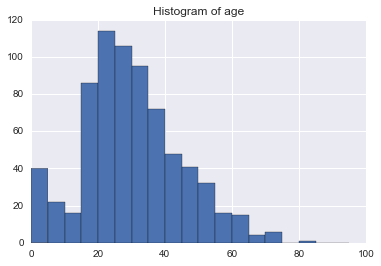

In [18]:
print "Max age is: " + str(df_age['Age'].max())
print "Min age is: " + str(df_age['Age'].min())
print "Mean age is: " + str(df_age['Age'].mean())

plt.hist(df_age['Age'], [5*x for x in range(0,20)])
plt.title("Histogram of age")

In the sample, most people were around 20 to 30. It is also noticable that there were many kids under 5, but not so many people older than 60.

To study the how different the ages were between people who survived and people who did not, we can group people by survival status and check the age distribution in each class.

In [19]:
age_survived = df_age['Age'][df_age['Survived']==1]
age_not_survived = df_age['Age'][df_age['Survived']==0]

This histogram of age of people survived is shown below.

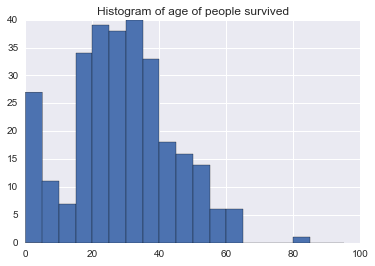

In [20]:
plt.hist(age_survived, [5*x for x in range(0,20)])
plt.title("Histogram of age of people survived")

This histogram of age of people not survived is shown below.

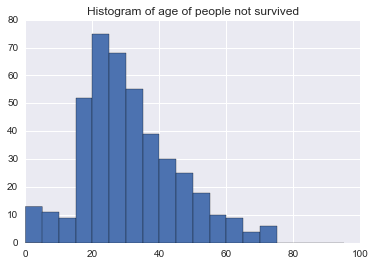

In [21]:
plt.hist(age_not_survived, [5*x for x in range(0,20)])
plt.title("Histogram of age of people not survived")

From the two histograms above, we can see overall their shapes are close, but clearly kids under 5 standed out in people who survived. Maybe kids under 5 were easier to find space to stay on lifeboats, or maybe they cried out so loud that they were easier to be found and rescued. There are many possible reasons why they made a larger portion in people who survived, but we could not draw the conclusion that it is their younger age that made them more likely to survive.

### 3. Conclusions

From the plots and statistical analyses above, we could draw following conclusions to answer the questions at the beginning of this project:

- People in higher passenger class were more likely to survive
- Females were more likely to survive than males
- Distributions of age are very close between people who survived and people who did not survive, but kids under 5 were of a higher portion in people who survived

However, these conclusions are only describing the correlation instead of the causation. It is not true that you would for sure to have a higher chance to survive if you were an under-5-year-old little girl who were of 1st class in the accident.

### 4. References

1. https://www.kaggle.com/c/titanic/data
2. https://classroom.udacity.com/courses/ud170
3. Wes McKinney. 2013. *Python for Data Analysis.* Sebastopol, CA: O'Reilly Media
4. http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.norm.html
5. http://www.math.uah.edu/stat/hypothesis/Bernoulli.html